In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv("data\housing-price-dataset.csv")
data #Displays all data and its corresponding index.

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [56]:
data.info() #prints information about null values in the dataset. No columns have null values, so we don't need to fix or delete any data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [57]:
#The "Neighborhood" column values are just words, so we cannot use it yet. We need to process that column individually first.
data = pd.get_dummies(data, columns=['Neighborhood'], drop_first=True) #Turns SUBURB and RURAL into true/false values.

Now, we need to split the data into two sections.
Section 1: Training data, this data will be used to train the model.
Section 2: Testing data, this data will be used to test against the trained model.

In [58]:
from sklearn.model_selection import train_test_split

#Define features (X) and target variable (y)
X = data.drop(['Price'], axis=1)
y = data['Price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

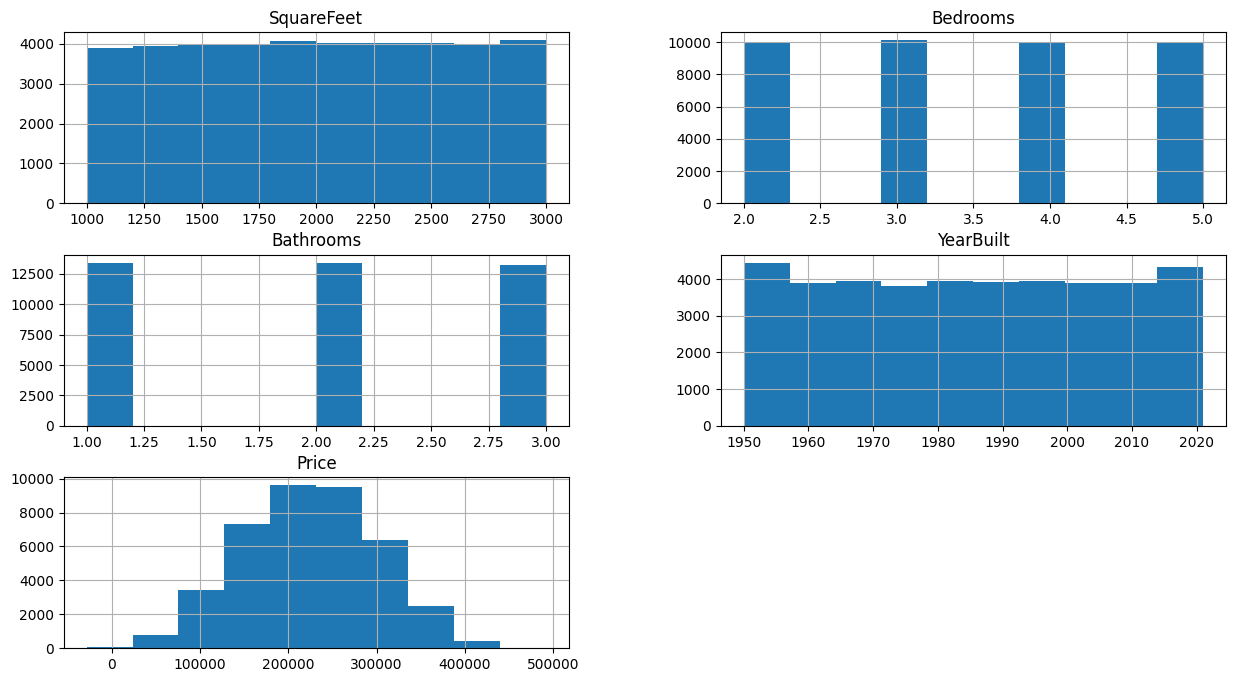

In [60]:
train_data = X_train.join(y_train)
train_data
train_data.hist(figsize=(15,8))

<Axes: >

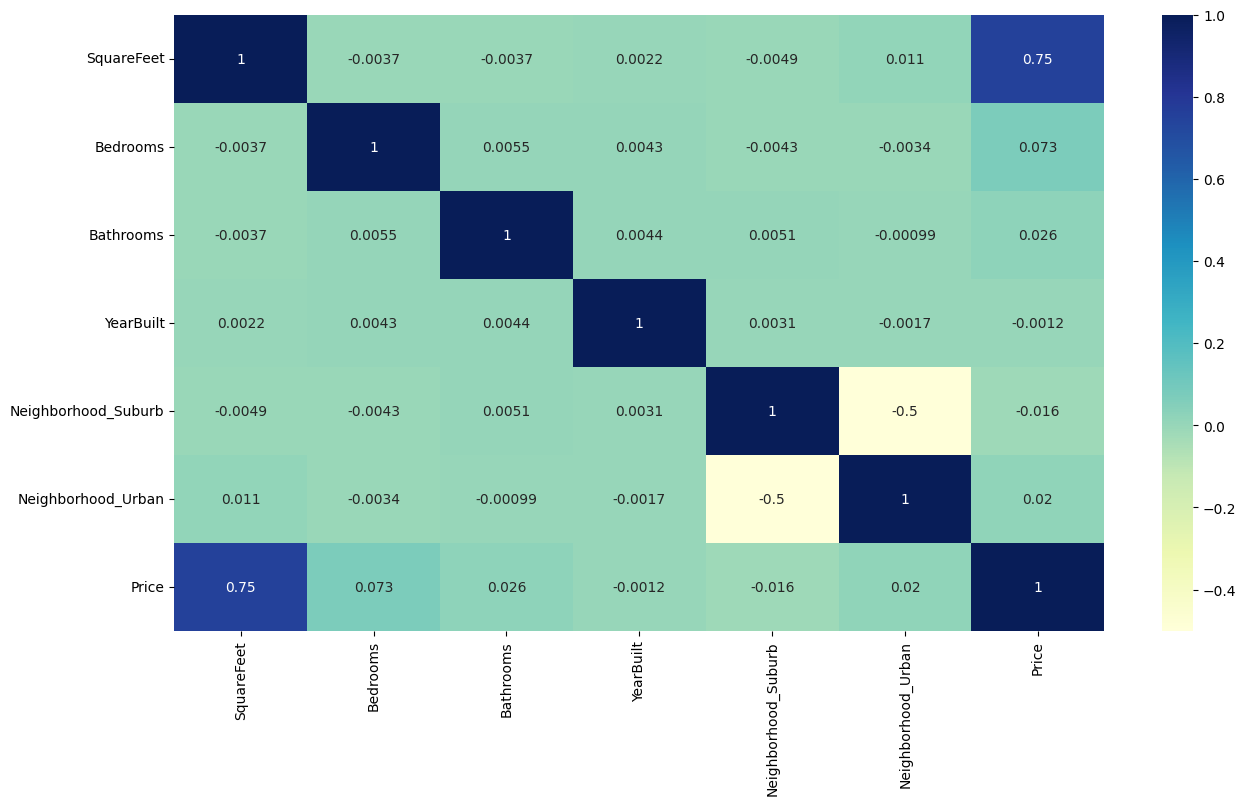

In [61]:
#train_data.corr() gives us a map of correlations. We create a heatmap based on this map of correlations
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

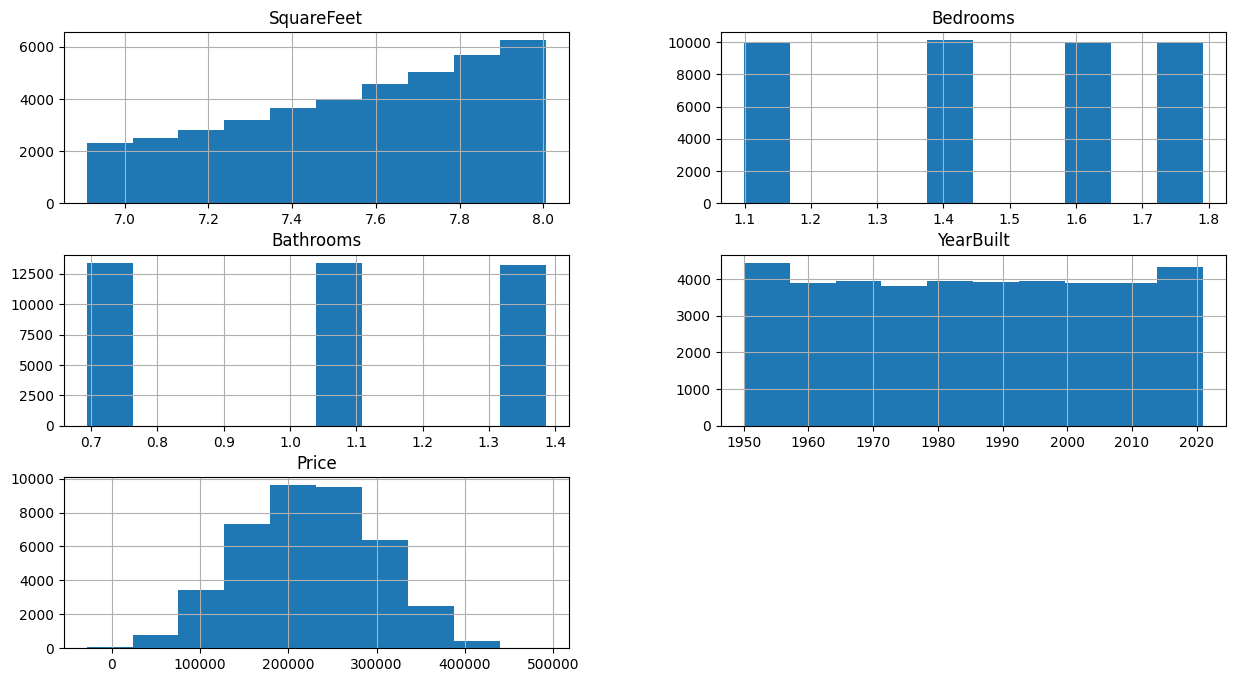

In [62]:
#We use np.log on columns in the data to get more distributed curves in our histogram.
train_data['SquareFeet'] = np.log(train_data['SquareFeet'] + 1)
train_data['Bedrooms'] = np.log(train_data['Bedrooms'] + 1)
train_data['Bathrooms'] = np.log(train_data['Bathrooms'] + 1)

train_data.hist(figsize=(15,8))

Now, we will work on creating the linear regression model 

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#We need to split the data into X and y again

scaler = StandardScaler()

x_train = train_data.drop(['Price'], axis = 1)
x_train_s = scaler.fit_transform(X_train)
y_train = train_data['Price']

reg = LinearRegression()

reg.fit(x_train, y_train)

c:\python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

LinearRegression()

In [64]:
test_data = X_test.join(y_test)

test_data['SquareFeet'] = np.log(test_data['SquareFeet'] + 1)
test_data['Bedrooms'] = np.log(test_data['Bedrooms'] + 1)
test_data['Bathrooms'] = np.log(test_data['Bathrooms'] + 1)

x_test = test_data.drop(['Price'], axis=1)
y_test = test_data['Price']

In [65]:
x_test_s = scaler.transform(X_test)
reg.score(X_test, y_test)

c:\python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

-25477282.627362702

-1825193204.1768553 is a terrible accuracy score; however, so far, we have only scaled the data. Now, we will try a more powerful model, in this case decision trees, to improve our accuracy rating.

In [66]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)
forest.score(x_test_s, y_test)

c:\python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.5166956145598587

51% is a MUCH better accuracy score, but we can do better. We will try different models.

In [67]:
from sklearn.model_selection import GridSearchCV

#with the parameter grid, we will do cross-validation with all combinations of these parameters.
paramater_grid = {
    "n_estimators": [30, 50, 100],
    "min_samples_split": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, paramater_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(x_train_s, y_train)

c:\python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\python39\lib\site-packages\sklear

KeyboardInterrupt: 

In [68]:
best_forest = grid_search.best_estimator_
best_forest

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [69]:
best_forest.score(x_test_s, y_test)

forest.fit(x_train_s, y_train)

model_filename = 'house-prediction-forest-model.pkl'

import joblib
joblib.dump(forest, model_filename)

c:\python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


['house-prediction-forest-model.pkl']